# 3D Lables EDA

Explor file structure, data structure and lables of our 3D images of mouse skulls and explore some of the issue facing the product development.

---

We are using the `nibabel` package to read the `.mnc` files

In [2]:
import matplotlib.pyplot as plt
import nibabel as nib
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
import numpy as np

In [6]:
img = nib.load("/Users/michaeldac/Code/CUNY/698/Skulls/475.mnc")

In [7]:
data = img.get_data()
print("The data shape is:", data.shape)
print("The type of data is:", type(data))
np.set_printoptions(precision=2, suppress=True)
print(data[1:5, 1:5, 1:5])

The data shape is: (698, 397, 456)
The type of data is: <class 'numpy.ndarray'>
[[[   7.98   93.98   99.02  301.98]
  [ 125.    152.    146.    356.  ]
  [  -3.98  -45.98   40.99  198.01]
  [ -51.02   83.    129.    -26.01]]

 [[ 181.01   90.02    1.02   -0.98]
  [  41.98 -118.01  -69.98  -13.  ]
  [  43.98 -114.99  -23.03  -62.  ]
  [ 108.99   19.02 -105.99 -132.02]]

 [[  32.02 -155.98  -89.      0.99]
  [  32.02 -208.   -107.98  -92.02]
  [ 132.99 -178.99   26.98  -58.98]
  [ 328.99  -59.99   38.01  -43.98]]

 [[  81.98   30.    134.01  -18.  ]
  [  77.03  108.02  156.02  -16.01]
  [ -69.01  -71.97   19.02  -19.99]
  [-108.99 -174.    -16.98   45.98]]]


In the small slice of the 3d numpy array show the data structure where brighter pixles are of a higher number.

Unlike many photos these allow negative value instead of having a scale of 0-255. More invistigation needs to be done to find out what the best way to scale these for a neural network are.

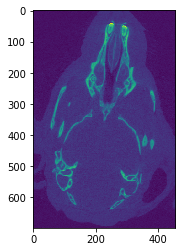

In [12]:
img_data = img.get_fdata()


def show_slices(slices):
    """Function to show image slices"""
    fig, axes = plt.subplot(1, len(slices), 1)
    i=0
    for  slice in slices:
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        i+=1

slice_0 = img_data[350, :, :]
slice_1 = img_data[:, 200, :]
slice_2 = img_data[:, :, 225]
#show_slices([slice_0, slice_1, slice_2])
# plt.suptitle("Center slices for EPI image")  # doctest: +SKIP


plt.imshow(slice_1)
plt.show()


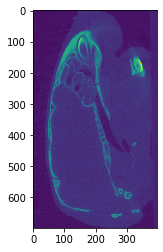

In [13]:
plt.imshow(slice_2)
plt.show()


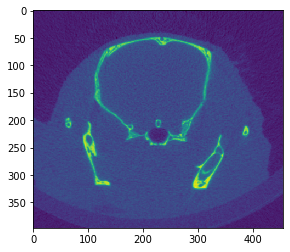

In [14]:
plt.imshow(slice_0)
plt.show()


The above images show three cross sections of the mouse skull.


In [15]:
import pandas as pd
from io import StringIO
from PreProcessing import tag_parser

In [18]:
tags = tag_parser('/Users/michaeldac/Code/CUNY/698/Skulls/475_landmarks.tag')
tags

,x,y,z
0,13.652586,7.049266,14.942536
1,10.068154,9.493763,8.103688
2,9.732130,5.165423,0.571014
3,6.821619,9.391604,7.672170
4,1.929773,6.428143,13.676378


In [19]:
tags.shape

(5, 3)

The 3D images are accompanied by `.tag` files that denote the `(x, y, z)` cordinates of key points measured in mm. There are currently only 4 points as initially we are only trying to orientate the mouse skulls in space.

---

To match these to the points on an our images we need to find out how large the voxels (3D pixles) are:


In [23]:
print("The voxel size is:", img.header.get_zooms(), 'mm in each dimension')

The voxel size is: (0.035, 0.035, 0.035) mm in each dimension


Therefore, we can divide the point location by the voxel size to get the points in space of the key points for this image.

In [29]:
pixel_loc = np.round(tags / 0.035)
pixel_loc

,x,y,z
0,390.0,201.0,427.0
1,288.0,271.0,232.0
2,278.0,148.0,16.0
3,195.0,268.0,219.0
4,55.0,184.0,391.0


When plotted on the skull image we can see that these points pertain to the left and right eyes, left and right front molars and the tip of the nose. 

These are used to orientate the skull in 3D space in order to make labeling easier.

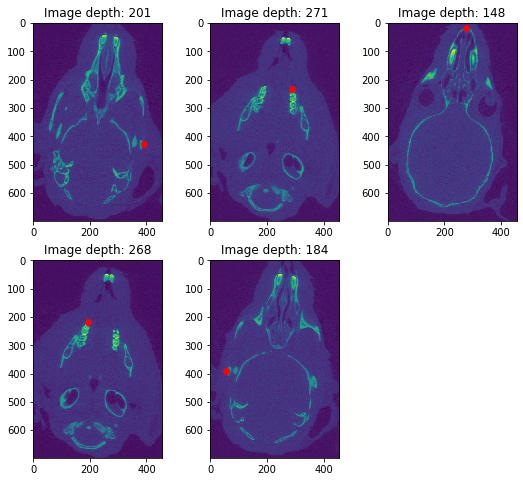

In [25]:
def mri_point_plot(img, df, dim_cols=['x', 'z'], iter_cols='y'):
    """Graphs an points. pt_cols is used to set the cols to iterate 
    over (different views)
    """
    
    ax = []
    fig = plt.figure(figsize=(9, 8))
    columns = 3
    rows = 2

    for i in df.index:
        y_slice = int(df.loc[i, iter_cols])
        im = img[:, y_slice, :]
        ax.append( fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title("Image depth: "+str(y_slice))  # set title
        plt.imshow(im)
        plt.plot(df.loc[i, dim_cols[0]], df.loc[i, dim_cols[1]], 'ro')
    plt.show()

mri_point_plot(img_data, pixel_loc, dim_cols=['x', 'z'])


Another example of a skull:

(0.035, 0.035, 0.035)


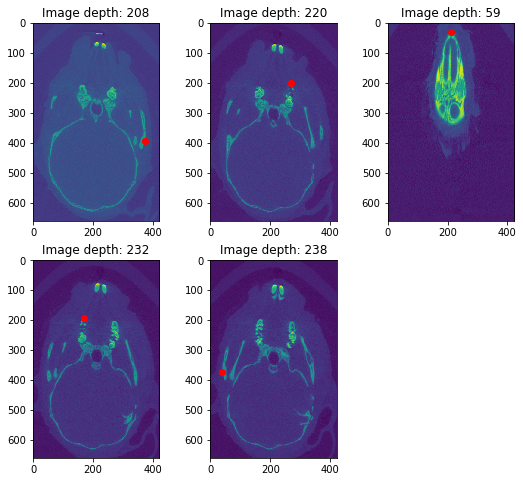

In [27]:
img2 = nib.load("/Users/michaeldac/Code/CUNY/698/Skulls/930.mnc")
tags2 = tag_parser("/Users/michaeldac/Code/CUNY/698/Skulls/930_landmarks.tag")



pix_size = img2.header.get_zooms()
print(pix_size)
img2 = img2.get_data()


tags2 = tags2 / pix_size[0]

mri_point_plot(img2, tags2)

(0.035, 0.035, 0.035)


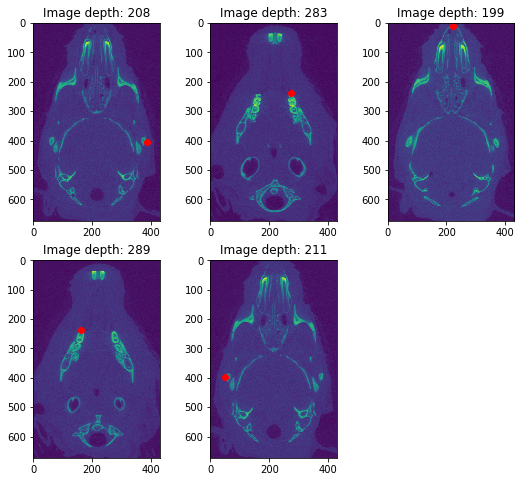

In [13]:
img2 = nib.load("MouseSkullData/943.mnc")
tags2 = tag_parser("MouseSkullData/943_landmarks.tag")



pix_size = img2.header.get_zooms()
print(pix_size)
img2 = img2.get_data()


tags2 = tags2 / pix_size[0]

mri_point_plot(img2, tags2)

(0.035, 0.035, 0.035)


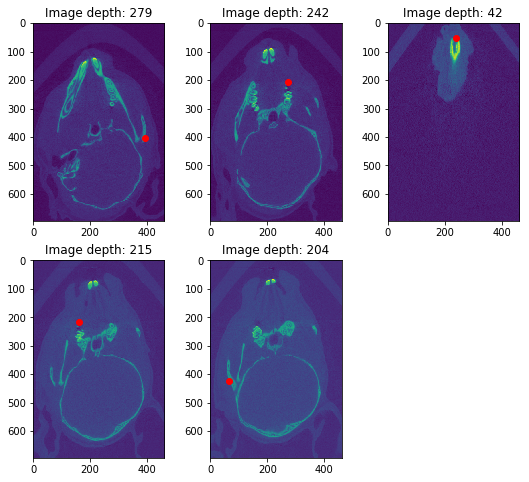

In [14]:
img2 = nib.load("MouseSkullData/1837.mnc")
tags2 = tag_parser("MouseSkullData/1837_landmarks.tag")



pix_size = img2.header.get_zooms()
print(pix_size)
img2 = img2.get_data()


tags2 = tags2 / pix_size[0]

mri_point_plot(img2, tags2)

# Explor image size

The actual image data when stored as a numpy array is huge at around 1 Gb

In [15]:
import sys
sys.getsizeof(img_data)

1010882816

In [16]:
print(round(sys.getsizeof(img_data) / 1e9, 2), "Gb")

1.01 Gb


Further, we need to be concerned at the dimensions of the images and the voxel size. The image dimensions are important because many deep learning algorithms require a uniform image input size. Further we will most likely have to scale the images down in order to be abel to perform and not overfit on such highly dimensional data. 

The voxel size is also important because our scales are denoted in milimeters and we need to match them to the appropritate location even with scaling.

In [17]:
import os
from tqdm import tqdm

files = os.listdir('MouseSkullData/')

In [18]:
mnc_files = [f for f in files if 'mnc' in f]

In [19]:
img_dims = {}
for i in tqdm(mnc_files):
    dims = nib.load(str('MouseSkullData/' + i)).header.get_data_shape()
    img_dims[i] = dims

dim_df = pd.DataFrame.from_dict(img_dims).T
dim_df.columns = ['x', 'y', 'z']

100%|██████████| 221/221 [00:00<00:00, 236.13it/s]


In [20]:
dim_df.head()

,x,y,z
4151.mnc,644,463,472
bh_cc_ce0111_skull.mnc,617,876,396
spry_8942.mnc,545,393,394
2915.mnc,673,491,520
717_2_8.mnc,510,464,395


In [21]:
img_res = {}
for i in tqdm(mnc_files):
    res = nib.load(str('MouseSkullData/' + i)).header.get_zooms()
    img_res[i] = res
    
res_df = pd.DataFrame.from_dict(img_res).T
res_df.columns = ['x', 'y', 'z']

100%|██████████| 221/221 [00:00<00:00, 368.24it/s]


In [22]:
res_df.head()

,x,y,z
4151.mnc,0.035,0.035,0.035
bh_cc_ce0111_skull.mnc,0.035,0.035,0.035
spry_8942.mnc,0.035,0.035,0.035
2915.mnc,0.035,0.035,0.035
717_2_8.mnc,0.035,0.035,0.035


In [23]:
res_df.loc[res_df.x != 0.035]

,x,y,z
a_84_skull_d45.mnc,0.038,0.038,0.038
f_62_skull_d60.mnc,0.038,0.038,0.038
e_76_skull_d21.mnc,0.038,0.038,0.038
b9d1_f140_37.mnc,0.037,0.037,0.037
c_38_skull_d21.mnc,0.038,0.038,0.038
d_116_skull_d21.mnc,0.038,0.038,0.038
b_36_skull_d45.mnc,0.038,0.038,0.038


In [24]:
dim_df.describe()

,x,y,z
count,221.000000,221.000000,221.000000
mean,688.918552,525.583710,485.452489
std,119.562546,138.144452,85.083028
min,279.000000,318.000000,322.000000
25%,640.000000,423.000000,427.000000
50%,686.000000,490.000000,462.000000
75%,733.000000,613.000000,525.000000
max,1425.000000,888.000000,762.000000


In [25]:
dim_df.loc[dim_df.y == 888]

,x,y,z
bh_cc_aa0839_skull.mnc,556,888,586


So we can see that the voxel size is almost always `0.035` however there are some images that differ. Further outside of this intial training example we can expect the voxel sizes to differ considerably. Thus we need a solution to scale to whatever size is inputted. 

----

We also need to pick an image ratio to pad our images to. The issue is that the dimensions are not all even xor odd. This means that adding a uniform band around one side of an image will not be an option. Instead the image band or pad size will have to be different by one pixel in aproximetly half of the specimens.

In [81]:
img = nib.load("MouseSkullData/1187.mnc")
data = img.get_data()
tags = tag_parser("MouseSkullData/1187_landmarks.tag")
pixel_loc = np.round(tags / 0.035)


In [82]:
from ThreeDLabeler import images

from ThreeDLabeler.PreProcessing import tag_parser
# importlib.reload(ThreeDLabeler.images)

im = images.Image(data, (0.035, 0.035, 0.035), tags)


In [83]:
print(im.point_positon)
print(im.voxels.shape)

            x           y           z
0  356.590353  265.569251  351.961654
1  223.927103  241.176115  192.829268
2  210.235759   89.996685   48.512193
3  133.062635  203.755379  196.010385
4   50.919192  152.404894  395.397323
(653, 453, 444)


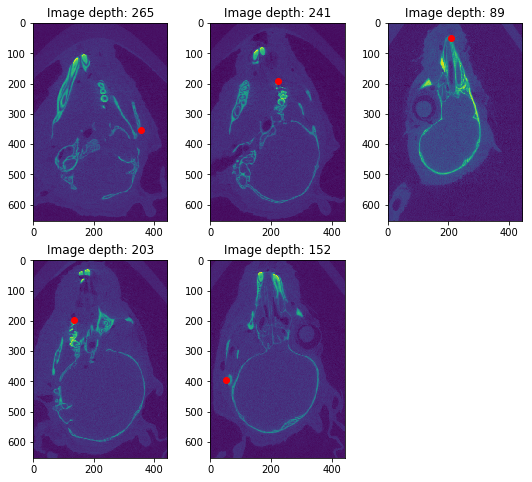

In [84]:
mri_point_plot(im.voxels, im.point_positon)

In [85]:
im.cube()

In [86]:
print(im.point_positon)
print(im.voxels.shape)

            x           y           z
0  356.590353  365.569251  456.961654
1  223.927103  341.176115  297.829268
2  210.235759  189.996685  153.512193
3  133.062635  303.755379  301.010385
4   50.919192  252.404894  500.397323
(653, 653, 653)


In [87]:
im.scale(128)

In [88]:
print(im.point_positon)
print(im.voxels.shape)

           x          y          z
0  69.898262  71.658291  89.572882
1  43.893827  66.876788  58.380010
2  41.210072  37.242842  30.091211
3  26.082722  59.541636  59.003567
4   9.981097  49.475998  98.087071
(128, 128, 128)


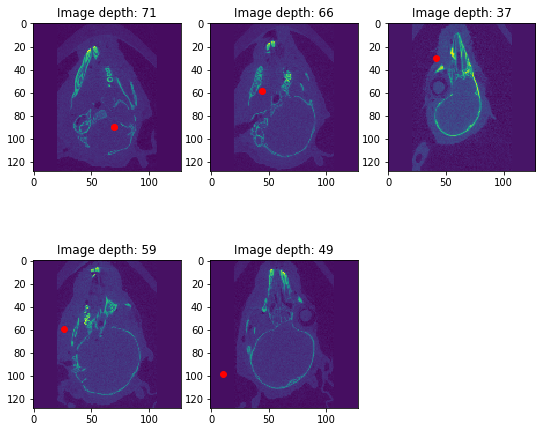

In [89]:
mri_point_plot(im.voxels, im.point_positon)

We can see this is positioning 